# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing all the necessary libraries and the MNSIT dataset from Keras.

* MNIST dataset has a training set of 60,000 examples, and a test set of 10,000 examples.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


Printing the shape of the input data and Displaying the First image using MATPLOTLIB



(60000, 28, 28)


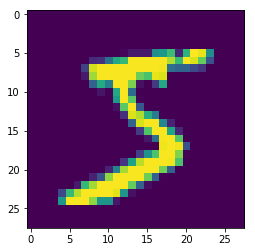

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

**Reshaping of the images in the dataset**

The dataset consists images of dimension 28x28 which is hard to accomodate in a multilayer neural network thus we convert the images using ***reshape()*** funtion

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

The pixel value of any cell can range from 0-255, just to normalize it we are dividing each cell value by 255. So, max and min value will range between 0-1 for easier calculation

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

First 10 actual output from the training data set



In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**One Hot Encoding is performed**

Converting the output into one hot encoded vectors for both Train dataset and Test dataset

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Printing the output of the first 10 data after One Hot Encoding

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)


Defining the structure of the neural network

1. 1st, Convolution layer, input=28x28x1 => Channel=(3x3x1), kernel=32 => Output = 26x26x32
2. 2nd, Convolution layer, input=28x28x1 => Channel=(3x3x1), kernel=16 => Output = 24x24x16
3. 3rd, Convolution layer, input=28x28x1 => Channel=(3x3x1), kernel=16 => Output = 22x22x16
4. 4th, Maxpooling layer, input=22x22x16 => Max pooling channel=(2x2) => Output = 11x11x16
5. 5th, Convolution layer, input=11x11x16 => Channel=(3x3x1), kernel=16 => Output = 9x9x16
6. 6th, Convolution layer, input=9x9x16 => Channel=(3x3x1), kernel=14 => Output = 7x7x14
7. 7th, Convolution layer, input=7x7x14 => Channel=(3x3x1), kernel=12 => Output = 5x5x12
8. 8th, Convolution layer, input=5x5x12 => Channel=(3x3x1), kernel=10 => Output = 3x3x10
9. 9th, Convolution layer, input=3x3x10 => Channel=(3x3x1), kernel=10 => Output = 1x1x10
10. 10th, Maxpooling layer, input=1x1x10 => Max pooling channel=(2x2) => Output = 1x1x10
11. 11th, Flattening the 1x1x10 into a 1-D array
12. 12th, Using softmax activation we are predicting different label for the input image




In [10]:
from keras.layers import Activation
model = Sequential()

# Convolution layer, input=28x28x1 => Channel=(3x3x1), kernel=32 => Output = 26x26x32
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28,28,1)))
model.add(BatchNormalization())

# Convolution layer, input=28x28x1 => Channel=(3x3x1), kernel=16 => Output = 24x24x16
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(BatchNormalization())


# Convolution layer, input=28x28x1 => Channel=(3x3x1), kernel=16 => Output = 22x22x16
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(BatchNormalization())


# Maxpooling layer, input=22x22x16 => Max pooling channel=(2x2) => Output = 11x11x16
model.add(MaxPooling2D())

# Convolution layer, input=11x11x16 => Channel=(3x3x1), kernel=16 => Output = 9x9x16
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(BatchNormalization())


# Convolution layer, input=9x9x16 => Channel=(3x3x1), kernel=14 => Output = 7x7x14
model.add(Conv2D(14, (3, 3), activation = 'relu'))
model.add(BatchNormalization())


# Convolution layer, input=7x7x14 => Channel=(3x3x1), kernel=12 => Output = 5x5x12
model.add(Conv2D(12, (3, 3), activation = 'relu'))
model.add(BatchNormalization())


# Convolution layer, input=5x5x12 => Channel=(3x3x1), kernel=10 => Output = 3x3x10
model.add(Conv2D(10, (3, 3), activation = 'relu'))
model.add(BatchNormalization())


# Convolution layer, input=3x3x10 => Channel=(3x3x1), kernel=10 => Output = 1x1x10
model.add(Conv2D(10, (1, 1), activation = 'relu'))
model.add(BatchNormalization())



# Maxpooling layer, input=1x1x10 => Max pooling channel=(2x2) => Output = 1x1x10
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
__________


Compiling the model based on following:

1. Optimization method: We are using 'adam' optimization method here.

2. For loss function we are using: binary crossentropy

In [0]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Start training the model:

1. Batch size: set to 32
2. Epochs: set to 10

In [19]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.0083 - acc: 0.9976
Epoch 2/10
60000/60000 [==============================] - 21s 347us/step - loss: 0.0079 - acc: 0.9977
Epoch 3/10
60000/60000 [==============================] - 21s 342us/step - loss: 0.0073 - acc: 0.9977
Epoch 4/10
60000/60000 [==============================] - 21s 344us/step - loss: 0.0071 - acc: 0.9978
Epoch 5/10
60000/60000 [==============================] - 21s 355us/step - loss: 0.0071 - acc: 0.9979
Epoch 6/10
60000/60000 [==============================] - 20s 340us/step - loss: 0.0063 - acc: 0.9981
Epoch 7/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.0061 - acc: 0.9983
Epoch 8/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.0059 - acc: 0.9982
Epoch 9/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.0056 - acc: 0.9982
Epoch 10/10
60000/60000 [==============================] - 20s 335us/step - loss: 

Evaluating the model performance



In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Printing the model performance Score



In [21]:
print(score)

[0.006351133722811937, 0.9981299961090088]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.81191626e-05 1.64610519e-05 4.30561413e-05 1.27573621e-05
  7.26377475e-05 1.09136263e-05 1.78871087e-05 9.99761164e-01
  2.10171129e-05 2.61187306e-05]
 [1.57980219e-04 1.88849765e-06 9.99791682e-01 3.68810834e-05
  4.92419804e-06 6.24131474e-07 2.49718300e-06 9.06754167e-07
  1.20193249e-06 1.49368520e-06]
 [1.68464176e-04 9.99124944e-01 1.06311090e-05 9.21601895e-06
  9.16229146e-06 2.52998638e-04 1.93856031e-05 3.62565945e-04
  2.98011018e-05 1.28742595e-05]
 [9.97869849e-01 1.30804488e-04 1.71385269e-04 1.01373851e-04
  1.47706276e-04 8.67229683e-05 1.42136356e-04 9.75386065e-04
  1.67008329e-04 2.07547317e-04]
 [2.92074954e-04 2.65346782e-04 3.47668247e-04 2.05644508e-04
  9.97409523e-01 1.75924230e-04 2.88334326e-04 2.55587249e-04
  3.38789279e-04 4.21025557e-04]
 [2.98777832e-05 9.99774635e-01 3.55404973e-06 4.12971167e-06
  3.06301422e-06 5.69762451e-05 2.94750998e-06 1.07053609e-04
  1.34302263e-05 4.30394948e-06]
 [1.11080483e-02 1.00915339e-02 1.32223368e-02 2.16834489e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()